# Logistic Regression #

## References ##

In order to make this notebook for Logistic Regression, I took heavy influence from UC Berkeley's [**DATA 100**](https://ds100.org/sp24/) textbook:

[Logistic Regression 1](https://ds100.org/course-notes/logistic_regression_1/logistic_reg_1.html)

[Logistic Regression 2](https://ds100.org/course-notes/logistic_regression_2/logistic_reg_2.html#regularized-logistic-regression)

I also referenced [AssemblyAI's](https://www.youtube.com/@AssemblyAI) YouTube video on implementing Logistic Regression from scratch: 

[Logistic Regression From Scratch](https://www.youtube.com/watch?v=YYEJ_GUguHw&t=80s&pp=ygUgbG9naXN0aWMgcmVncmVzc2lvbiBmcm9tIHNjcmF0Y2g%3D)

## What is Logistic Regression? ##

* Logistic Regression is a type of supervised machine learning algorithm used primarily for binary classification
* We often denote each one of our classes with either a $0$ or $1$
* For example, in the case we are trying to classify an email as **spam** or **ham** (not spam), we could say the class of $1$ corresponds to **spam** and $0$ as **ham**
* Logistic regression is often used to model the probability of a given input being of the $1$ class




### Mathematical Model ###

* Like it's name, Logistic Regression is modeled through the logistic function
* The standard function is as follows: 

$$\large \sigma(z) = \frac{1}{1 + e^{-z}}$$

* Here, we define $z$ as a linear combination of features we want to use to predict our response: 

$$\large z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n $$

where:
- $t$ represents the linear combination of input features and their associated weights,
- $\theta_0, \theta_1, \theta_2, \ldots, \theta_n$ are the weights, and
- $x_1, x_2, \ldots, x_n$ are the input features.

* The output of $\sigma(z)$ is a value between $0$ and $1$, corresponding the probability with which our inputted $x$ is of class $1$





### Estimation Techniques: Maximum Likelihood Estimate ###



* $Maximum\ \ Likelihood\ \ Estimate\ \ (MLE)\ $ is a common method used to estimate the parameters, that is our $\theta_1, \theta_2, \ldots $ and so forth
* Won't go into the math behind $MLE$

## Model Evaluation ##

#### Why not MSE? ####

* One might think we should use $Mean\ \ Squared\ \ Error\ \ (MSE)\ $ as our error metric, but it turns out that $MSE$ is not suited for logistic regression
1)  In essence, the $MSE$ surface is *non-convex*, meaning that during **gradient descent** we run the risk of converging on a local minimum, missing the true optimum parameters of $\theta$: 
<center>

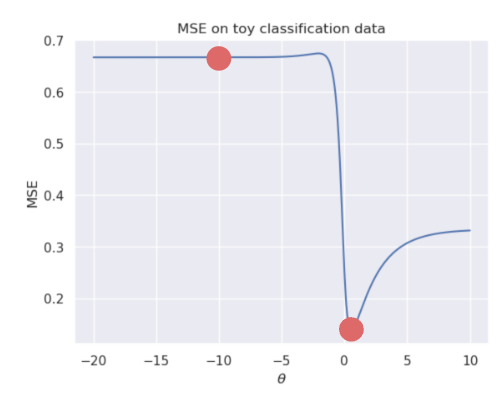
</center>

2) Squared loss is *bounded* for a classification task. If you recall that $y$ has a value of either 0 or 1. This means that even if our model makes the worst possible prediction (predicting $p$ = $0$ for $y$ = 1) the squared loss for an observation will be no greater than 1: 

$$(y - p)^2 = (1 - 0)^2 = 1$$

* So having MSE does not strongly penalize poor predictions: 
<center>

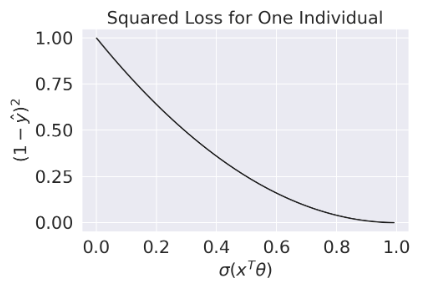
</center>



#### Motivating Cross-Entropy Loss ####

* Let $y$ be the binary label (of $0$ or $1$) and $p$ be the model's predicted probability of the label $y$ being 1. 
* In the case where the true $y$ is 1, we would want to incur *low* loss when the model predicts a large $p$
* When the true $y$ is 0, we should incur *high* loss when the model predicts large $p$

* Suffice to say that our loss function should behave differently depending on the value of our true class, $y$

* In order to account for both of these changes, we define the **cross-entropy loss** (for one data point): 

$$
\text{Cross-Entropy Loss} =
\begin{cases}
- \log(p) & \text{if } y = 1 \\
- \log(1 - p) & \text{if } y = 0
\end{cases}
$$

Let's now observe what the **cross-entropy loss** looks like for when $y$ = $0$ and when $y$ = $1$

<center>

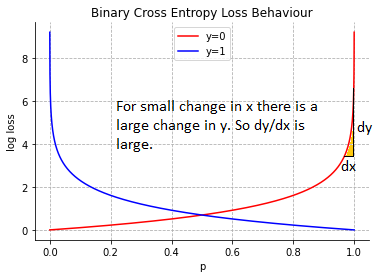
</center>


We notice that for the blue graph, or when the true $y$ is $1$, as $p \to 0, $ loss approaches $\infty$ and as $p \to 1, $ loss approaches $0$

We notice that for the red graph, or when the true $y$ is $0$, as $p \to 0, $ loss approaches $0$ and as $p \to 1, $ loss approaches $\infty$

We can re-define **cross-entropy loss** as: 

$$ 
\text{Cross-Entropy Loss} = -(y \log(p) + (1 - y) \log(1 - p))
$$

In order to find the best estimate of $\hat{\theta}$, we can optimize the following: 

$$
\hat{\theta} = \ -\frac{1}{n} \sum_{i=1}^{n} \left(y_i \log(\sigma(X_i^T \theta)) + (1 - y_i) \log(1 - \sigma(X_i^T \theta))\right)
$$


* Our loss function is now convex! 


## Now we're going to implement a Logistic Regression Model! ##

Here are the steps we're going to take: 
1) **Training:** 
    * Initialize weights as zero 
    * Initialize bias as zero 
2) **Given a data point:** 
    * Predict result by using:
    $$ \hat{y} = \frac{1}{1 + e^{-wx+b}} $$
    * Calculate error 
    * Use gradient descent to figure out new weight and bias values 
    * Repeat n times
3) **Testing:**
    *Given a data point, we want to: 
    * Put the values from the data point into the equation  $$\hat{y} = \frac{1}{1 + e^{-wx+b}}$$
    * Choose the label based on the probability

In [25]:
#Import statements
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [26]:
import numpy as np  # Importing numpy library for numerical operations

def sigmoid(x):  # Defining the sigmoid function
    return 1/(1 + np.exp(-x))  # Computing the sigmoid function value for input x


class LogisticRegression():  # Defining a logistic regression class

    def __init__(self, learning_rate=0.001 , n_iterations= 1000):  # Initializing the logistic regression model with default learning rate and number of iterations
        self.learning_rate = learning_rate  # Setting the learning rate
        self.n_iterations = n_iterations  # Setting the number of iterations
        self.weights = None  # Initializing weights to None
        self.bias = None  # Initializing bias to None

    def fit(self, X, y):  # Training the logistic regression model
        n_samples, n_features = X.shape  # Getting the number of samples and features in the input data
        self.weights = np.zeros(n_features)  # Initializing weights to zeros
        self.bias = 0  # Initializing bias to zero

        for i in range(self.n_iterations):  # Looping over the specified number of iterations
            linear_predictions = np.dot(X, self.weights) + self.bias  # Computing linear predictions
            predictions = sigmoid(linear_predictions)  # Computing predictions using the sigmoid function
        
            gradient_weights = (1/n_samples) * np.dot(X.T, (predictions - y))  # Computing gradient of weights
            gradient_bias = (1/n_samples) * np.sum(predictions - y)  # Computing gradient of bias

            self.weights = self.weights - self.learning_rate * gradient_weights  # Updating weights using gradient descent
            self.bias = self.bias - self.learning_rate * gradient_bias  # Updating bias using gradient descent

    def predict(self, X):  # Making predictions
        linear_predictions = np.dot(X, self.weights) + self.bias  # Computing linear predictions
        y_predictions = sigmoid(linear_predictions)  # Computing predictions using the sigmoid function
        class_predictions = [0 if y <=0.5 else 1 for y in y_predictions]  # Converting predictions to binary classes
        return class_predictions  # Returning the predicted classes

#### Now that we have an implementation of a logistic regression, let's test it out on one of Sklearn's included datasets! ####

In [27]:
import warnings  # Importing the warnings module to handle warnings

# Suppress the warning temporarily
with warnings.catch_warnings():  # Using the context manager to catch warnings
    warnings.simplefilter("ignore")  # Ignoring all warnings temporarily
    
    # Loading the breast cancer dataset and splitting it into train and test sets
    breast_cancer = datasets.load_breast_cancer()
    X, y = breast_cancer.data, breast_cancer.target 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiating and training the logistic regression classifier
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    y_predictions = classifier.predict(X_test)

    # Defining a function to compute accuracy
    def accuracy(y_pred, y_test):
        return np.sum(y_pred == y_test) / len(y_test)

    # Computing accuracy and printing the result
    acc = accuracy(y_predictions, y_test)
    print(f'Our accuracy was {acc}')

Our accuracy was 0.9473684210526315


### Decision Boundaries ###

* Note that above in our current logistic regression model, we set the **decision boundary** to be set to 0.5 
* That is, if the outputted probability of a point was greater than 0.5, it was classified as $1$ and less than or equal to, $0$

### Is accuracy the best way to quantify Error? ###

* We define accuracy to be of the following form: 

$$ \text{accuracy} = \frac{\#\text{ of points classified correctly}}{\#\text{ of total points}} $$

Let's consider the following situation:  
* We have $100$ emails where $5$ are *truly* spam and the remaining $95$ are *truly* ham (that is, they're not spam)
* We also have **Model 1:** Our first model classifies each spam email as non-spam. 
    * In this case, by the definition of accuracy, our model's accurac is high ($\frac{95}{100} = 0.95$) but it doesn't detect and spam emails. Despite its high accuracy, this would be a bad model
* We also have **Model 2:** This model classifies each email as being spam. While its accuracy is now low ($\frac{5}{100} = 0.05$), the model correctly labels each spam email! 
    * If we were to simply use accuracy as our main metric for evaluation, this model would be considered "poor", even though it accomplishes the goal of finding spam emails 

* In summary, accuracy is not always the *best* metric for classification, especially in the case where our data has class imbalances 



#### Types of Classification ####

There are 4 different classifications our model could possibly make: 
1) **True positive**: correctly classifies a positive point as being positive ($y = 1$ and $\hat{y} = 1$)
2) **True negative**: correctly classifies a negative point as being negative ($y = 0$ and $\hat{y} = 0$)
3) **False positive**: incorrectly classifies a negative point as being positive ($y = 0$ and $\hat{y} = 1$)
4) **False negative**: incorrectly classifies a positive point as being negative ($y = 1$ and $\hat{y} = 0$)

These classifications can be displayed in a **confusion matrix**:

<center>

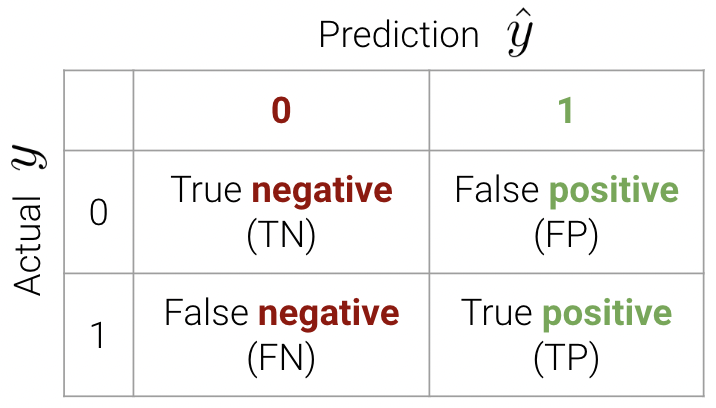
</center>




#### Precision, and Recall ###

**Precision** is defined as: 

$$ \text{precision} = \frac{\text{Number of True Positives}}{\text{Number of True Positives} + \text{Number of False Positives}} $$
* You can think of it as "Our of all the outputted $1$'s our model has outputted, *how many* of those were *actually* $1$?"
* Measures how accurate the classifier is when its predictions are positive

**Recall** or **Sensitivity** is defined as: 
$$ \text{recall} = \frac{\text{Number of True Positives}}{\text{Number of True Positives} + \text{Number of False Negatives}} $$
* You can think of **recall** as "Out of all the observations that were actually $1$, what proportion were predicted to be $1$?"
* It measure how many positive predictions were missed

Learning these two further metrics can be confusing at first! Here'a a visual summarizing the main points: 

<center>

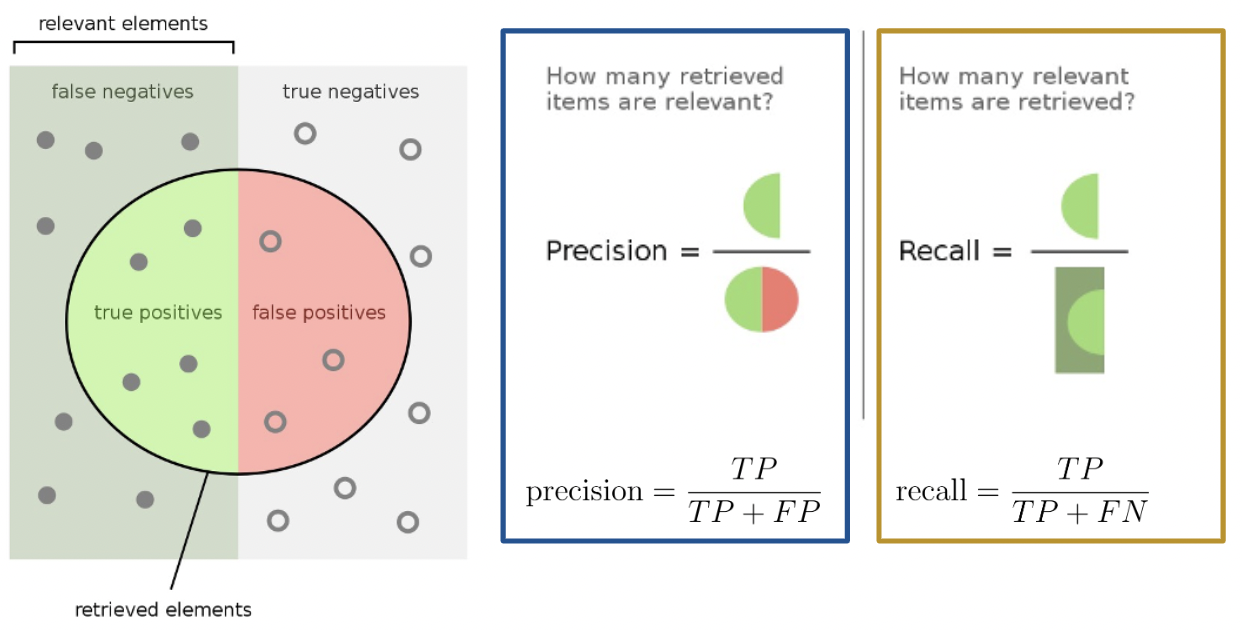
</center>



### Example Calculations ###

In [29]:
from sklearn.metrics import confusion_matrix  # Importing confusion_matrix function from sklearn.metrics

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Initialize counters
TP = 0  # True Positives
FP = 0  # False Positives
TN = 0  # True Negatives
FN = 0  # False Negatives

# Iterate over each sample
for true_label, pred_label in zip(y_test, y_predictions):  # Looping through true and predicted labels
    if true_label == 1 and pred_label == 1:  # If true positive
        TP += 1
    elif true_label == 0 and pred_label == 1:  # If false positive
        FP += 1
    elif true_label == 0 and pred_label == 0:  # If true negative
        TN += 1
    elif true_label == 1 and pred_label == 0:  # If false negative
        FN += 1

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate TP, FP, TN, FN from confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Print the counts
print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Our Precision is: ", precision)
print("Our Recall is:  ", recall)

Confusion Matrix:
[[43  0]
 [ 6 65]]
True Positives: 65
False Positives: 0
True Negatives: 43
False Negatives: 6
Our Precision is:  1.0
Our Recall is:   0.9154929577464789


Instead of having to manually calculate **precision** and **recall** each time, we can use `sklearn metrics` to get the same values:

In [31]:
from sklearn.metrics import precision_score, recall_score  # Importing precision_score and recall_score functions from sklearn.metrics

# Calculate precision and recall
Precision = precision_score(y_test, y_predictions)  # Computing precision
Recall = recall_score(y_test, y_predictions)  # Computing recall

# Print precision and recall
print("Precision:", Precision)
print("Recall:", Recall)

# Calculate and print false negative rate
False_Negative_Rate = 1 - Recall  # Computing false negative rate
print("False Negative Rate:", False_Negative_Rate)

Precision: 1.0
Recall: 0.9154929577464789
False Negative Rate: 0.08450704225352113


## Interpretation ##

Our current `classifier` seems to be doing very well! 
* We notice that our `Precision` is $1$, implying that our `classifier` does not output any **false positives**
    * Now, depending on the situation in which you use your classifier, **precision** may have more / less weight as a metric 
    * From our data, since we are trying to predict if someone has breast cancer, our precision of $1$ means we never misclassified someone as having breast cancer, when in reality they didn't

* We notice that our `Recall` is roughly $0.92$
    * This means that out of all our points which are classified as having breast cancer, our model outputs that $91\%$ of those observations were correctly classified as having breast cancer
    * This also means that our **False Negative** rate is $1$ - `Recall`, roughly $8.5\%$
    * In the context of our data, a **False Negatve** means that for someone who actually *has* breast cancer, they are predicted to *not* have it
    * `Recall`, in this case, is probably our **MOST IMPORTANT** metric. It is far worse to diagnose someone as **not** having cancer when in reality they actually do
    * $0.92$ is a very solid Recall rate, but that also means that around $8\%$ of the time, our model would classify someone as not having breast cancer when they actually do 
    * So while we have a pretty good classifier, there is still room for improvement!


# Thank you for Reading! #